Plot climate_var data over Germany. 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from netCDF4 import Dataset

ModuleNotFoundError: No module named 'cartopy'

Set spatial and temporal extend.

In [ ]:
timesteps = 10 
start_lon = 370
end_lon = 392
start_lat = 67
end_lat = 88

Load .nc-file and save the relevant variables. This makes rendering much faster when the nc-file is large. In this example, you can skip this part and continue with the next cell which load the pickle files. 

In [ ]:
filename = "/Users/ninaeffenberger/phd/2022-03-WpGermany/code/wp-germany/data/raw_data/CMIP6/german_area_7080/canesm5_r1i1p1f1_w5e5_ssp585_sfcwind_lat45.0to57.0lon5.0to16.0_daily_2071_2080.nc"
data = Dataset(filename)
climate_var = data.variables["sfcwind"][:]
climate_var = climate_var[0:timesteps, start_lat:end_lat,start_lon:end_lon].flatten()

# Germany is lon: 6:16, 146:156
lons, lats = np.meshgrid(
    data.variables["lon"][start_lon:end_lon], data.variables["lat"][:][start_lat:end_lat]
)
pd.DataFrame(lons).to_pickle(
    "src/dummy_data/lons"
)
pd.DataFrame(lats).to_pickle(
    "src/dummy_data/lats"
)
pd.DataFrame(climate_var).to_pickle(
    "src/dummy_data/climate_var"
)

OSError: Cannot save file into a non-existent directory: 'src/dummy_data'

Load the pickle-files. 

In [ ]:
lons = np.load("dummy_data/lons", allow_pickle=True)
lats = np.load("dummy_data/lats", allow_pickle=True)
clim_var = np.load("dummy_data/climate_var", allow_pickle=True)
climate_var = np.array(clim_var).reshape(timesteps,21,22)

Generate the plot. 

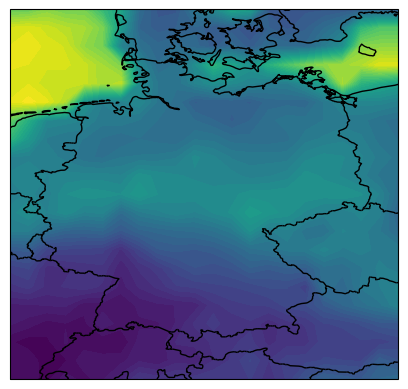

In [ ]:
%matplotlib inline
from IPython.display import display, clear_output
for i in np.arange(0, timesteps):
    # set the axes' spatial projection, styling, and title
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    # generate the contour map
    plt.contourf(
        lons,
        lats,
        climate_var[i],
        60,
        transform=ccrs.PlateCarree(),
    )
    ax.add_feature(cf.BORDERS, edgecolor="black")
    clear_output(wait = True)
    plt.pause(1)